In [1]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
audio1, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech Processing/045FCN008.wav', sr=16000)
audio2, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/Speech Processing/MAZARIB26.wav', sr=16000)

In [4]:
from IPython.display import Audio
Audio(audio1, rate=sr)

In [5]:
Audio(audio2, rate=sr)

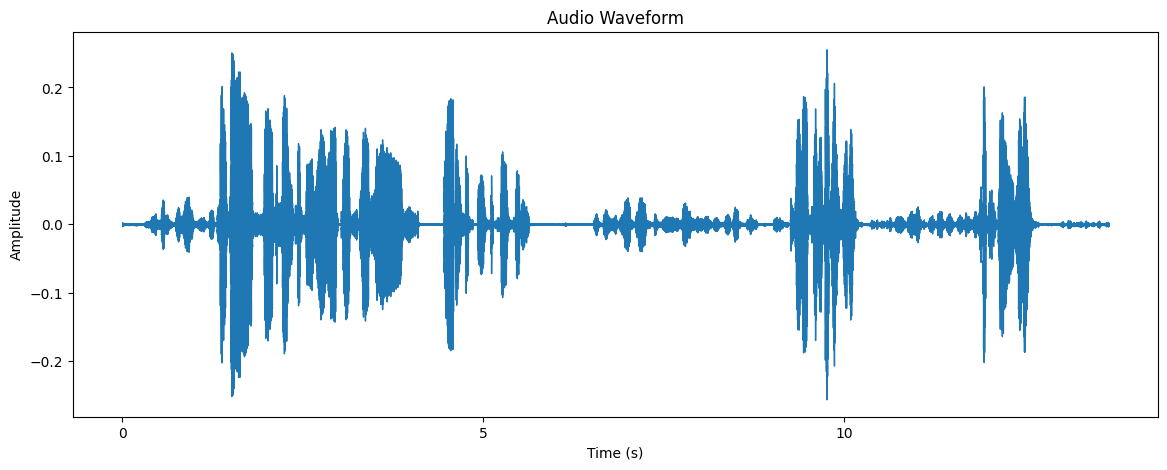

In [6]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio2, sr=sr)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

In [7]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

processor = WhisperProcessor.from_pretrained("openai/whisper-large-v3-turbo")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-large-v3-turbo")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

In [8]:
input_features = processor(audio1,  sampling_rate=sr, return_tensors="pt").input_features
input_features = input_features.to(model.device)

forced_decoder_ids = processor.get_decoder_prompt_ids(language="ur", task="transcribe")
predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [9]:
import time
start_time = time.time()
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
end_time = time.time()
print(transcription[0])

 اس پوشٹ کو شیئر کریں


In [10]:
input_features = processor(audio2,  sampling_rate=sr, return_tensors="pt").input_features
input_features = input_features.to(model.device)

forced_decoder_ids = processor.get_decoder_prompt_ids(language="ur", task="transcribe")
predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)

In [11]:
start_time = time.time()
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
end_time = time.time()
print(transcription[0])

 جی بالکل آپ مجھے کہہے ہیں کہ وہ سٹیٹ بینک کی تیم آئی ہوئے تھا اس لیے میں جار ہوں کہ اپنے آپ کو سیف کرلوں ٹھیک ہے مجھے آپ رابطے کے لیے موبائل نمبر دیتے کا اپنا 0300 690
